Exploratory data analysis (EDA) is a crucial component of data science which allows you to understand the basics of what your data looks like and what kinds of questions might be answered. For this task, we are going to clean, sanitise and explore our data. Using the movies dataset, complete the steps outlined in this notebook by writing code in the cells.

In [99]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [100]:
#### Load the movies dataset 
movies_df = pd.read_csv('movies.csv')
movies_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


### Data Cleansing
#### Clean the data

Identify columns that are redundant or unnecessary. It is always easier to make your decisions based on data which is relevant and concise. Remove the following columns `['homepage', 'keywords', 'original_language', 'original_title', 'overview', 'production_companies', 'status', 'tagline']` from the data set as they will not be used in the analysis.

In [101]:
# Code here

# Load your dataset (replace 'movies.csv' with the actual file path)
import pandas as pd
df = pd.read_csv('movies.csv')

# List of columns to remove
columns_to_remove = ['homepage', 'keywords', 'original_language', 'original_title', 'overview', 'production_companies', 'status', 'tagline']

# Remove the specified columns
df_cleaned = df.drop(columns=columns_to_remove)

# Display the first few rows of the cleaned dataset to verify
df_cleaned.head()


,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",John Carter,6.1,2124


#### Remove any duplicate rows

In [102]:
# Code here
# Remove entries with a zero budget
df = df[df['budget'] > 0]


#### Remove rows with missing data 

Some movies in the database have zero budget or zero revenue which implies that their values have not been recorded or some information is missing. Discard such entries from the dataframe.

In [103]:
# Code here
# Remove rows with zero budget or zero revenue
df = df[(df['budget'] > 0) & (df['revenue'] > 0)]


#### Change data types
To manipulate the columns easily, it is important that we make use of the python objects. Change the release date column into `DateTime` format and extract the year from the date. This will help us in analysing yearly data.

In [104]:
# Change the release_date column to DateTime
df['release_date'] = pd.to_datetime(df['release_date'])

# Extract the release year from every release date
df['release_year'] = df['release_date'].dt.year

Change budget and revenue columns to a integer data type using numpy’s `int64` method.

In [105]:
# Code here
import numpy as np

# Change 'budget' and 'revenue' columns to int64 data type
df['budget'] = df['budget'].astype(np.int64)
df['revenue'] = df['revenue'].astype(np.int64)


On checking the dataset, we see that `genres`, `production_countries`, `spoken_languages` are in the JSON format which will make it difficult to manipulate the dataframe. The `parse_col_json function` flattens these columns into a format that can be easily interpreted.

In [106]:
# Convert from JSON format to a list of strings
def parse_col_json(column, key):
    """
    Args:
        column: string
            name of the column to be processed.
        key: string
            name of the dictionary key which needs to be extracted
    """
    for index,i in zip(movies_df.index, movies_df[column].apply(json.loads)):
        list1=[]
        for j in range(len(i)):
            list1.append((i[j][key]))# the key 'name' contains the name of the genre
        movies_df.loc[index, column] = str(list1)
    
# Flatten data in columns
parse_col_json('genres', 'name')
parse_col_json('production_countries', 'name')
parse_col_json('spoken_languages', 'name')


In [107]:
# Inspect flattened data
movies_df.sample(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
1045,40000000,"['Comedy', 'Drama', 'Family', 'Romance']",NaN,11130,"[{""id"": 2505, ""name"": ""coronation""}, {""id"": 42...",en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,30.002907,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",['United States of America'],2004-08-06,95149435,113.0,['English'],Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,6.0,697


### Finding Certain Genres
Locate all movies in the "Action" genre. 

In [108]:
# Locate all movies in the "Action" genre
action_movies = df[df['genres'].str.contains('Action', case=False)]

# Create a new DataFrame containing only "Action" genre movies
action_movies_df = pd.DataFrame(action_movies)

# Reset the index of the new DataFrame
action_movies_df.reset_index(drop=True, inplace=True)


### Now onto the exploration

#### Identify relationships between variables (features)

The main goal here is to identify and create relationships that can help you formulate ideas. We have defined questions to help you identify some relationships to explore.

#### Which are the 5 most expensive movies? 

How do the most expensive and cheapest movies compare? Exploring the most expensive movies highlights if some movies are worth the money spent on them based on their performance and revenue generated.

In [109]:
# Code here
# Sort the DataFrame by 'budget' column in descending order to get the most expensive movies
most_expensive_movies = df.sort_values(by='budget', ascending=False).head(5)

# Sort the DataFrame by 'budget' column in ascending order to get the cheapest movies
cheapest_movies = df.sort_values(by='budget', ascending=True).head(5)

# Display the 5 most expensive movies
print("5 Most Expensive Movies:")
print(most_expensive_movies[['original_title', 'budget', 'revenue']])

# Display the 5 cheapest movies
print("\n5 Cheapest Movies:")
print(cheapest_movies[['original_title', 'budget', 'revenue']])



5 Most Expensive Movies:
                                 original_title     budget     revenue
17  Pirates of the Caribbean: On Stranger Tides  380000000  1045713802
1      Pirates of the Caribbean: At World's End  300000000   961000000
7                       Avengers: Age of Ultron  280000000  1405403694
10                             Superman Returns  270000000   391081192
4                                   John Carter  260000000   284139100

5 Cheapest Movies:
          original_title  budget  revenue
4238        Modern Times       1  8500000
3611  A Farewell to Arms       4       25
3372        Split Second       7        5
3419        Bran Nue Dae       7        7
4608        The Prophecy       8       16


#### What are the top 5 most profitable movies? 

Compare the min and max profits. The comparison helps us identify the different approaches which failed and succeeded. Subtracting the budget from the revenue generated, will return the profit earned.

In [110]:
# Code here
# Calculate profit for each movie by subtracting 'budget' from 'revenue'
df['profit'] = df['revenue'] - df['budget']

# Sort the DataFrame by 'profit' column in descending order to get the most profitable movies
most_profitable_movies = df.sort_values(by='profit', ascending=False).head(5)

# Find the movie with the minimum profit
least_profitable_movie = df[df['profit'] == df['profit'].min()]

# Display the 5 most profitable movies
print("Top 5 Most Profitable Movies:")
print(most_profitable_movies[['original_title', 'profit']])

# Display the movie with the minimum profit
print("\nLeast Profitable Movie:")
print(least_profitable_movie[['original_title', 'profit']])



Top 5 Most Profitable Movies:
    original_title      profit
0           Avatar  2550965087
25         Titanic  1645034188
28  Jurassic World  1363528810
44       Furious 7  1316249360
16    The Avengers  1299557910

Least Profitable Movie:
     original_title     profit
13  The Lone Ranger -165710090


#### Find the most popular movies. 
Sort the dataframe based on the popularity column.

In [111]:
# Code here
# Sort the DataFrame by 'popularity' column in descending order to get the most popular movies
most_popular_movies = df.sort_values(by='popularity', ascending=False)

# Display the most popular movies
print("Most Popular Movies:")
print(most_popular_movies[['original_title', 'popularity']])



Most Popular Movies:
                                       original_title  popularity
546                                           Minions  875.581305
95                                       Interstellar  724.247784
788                                          Deadpool  514.569956
94                            Guardians of the Galaxy  481.098624
127                                Mad Max: Fury Road  434.278564
...                                               ...         ...
4065                                       Mi America    0.039007
2970                               There Goes My Baby    0.037073
3225                                            Limbo    0.034259
4105  The Book of Mormon Movie, Volume 1: The Journey    0.031947
3921                            Woman Thou Art Loosed    0.019984

[3229 rows x 2 columns]


#### Find Movies which are rated above 7

In [112]:
# Code here
# Filter the DataFrame to find movies rated above 7
highly_rated_movies = df[df['vote_average'] > 7]

# Display the highly rated movies
print("Movies Rated Above 7:")
print(highly_rated_movies[['original_title', 'vote_average']])




Movies Rated Above 7:
                              original_title  vote_average
0                                     Avatar           7.2
3                      The Dark Knight Rises           7.6
6                                    Tangled           7.4
7                    Avengers: Age of Ultron           7.3
8     Harry Potter and the Half-Blood Prince           7.4
...                                      ...           ...
4713                              Roger & Me           7.4
4724                              Eraserhead           7.5
4738                                      Pi           7.1
4773                                  Clerks           7.4
4792                                     キュア           7.4

[637 rows x 2 columns]


#### Most successful genres 
Create a bar plot explaining the frequency of movies in each genre.

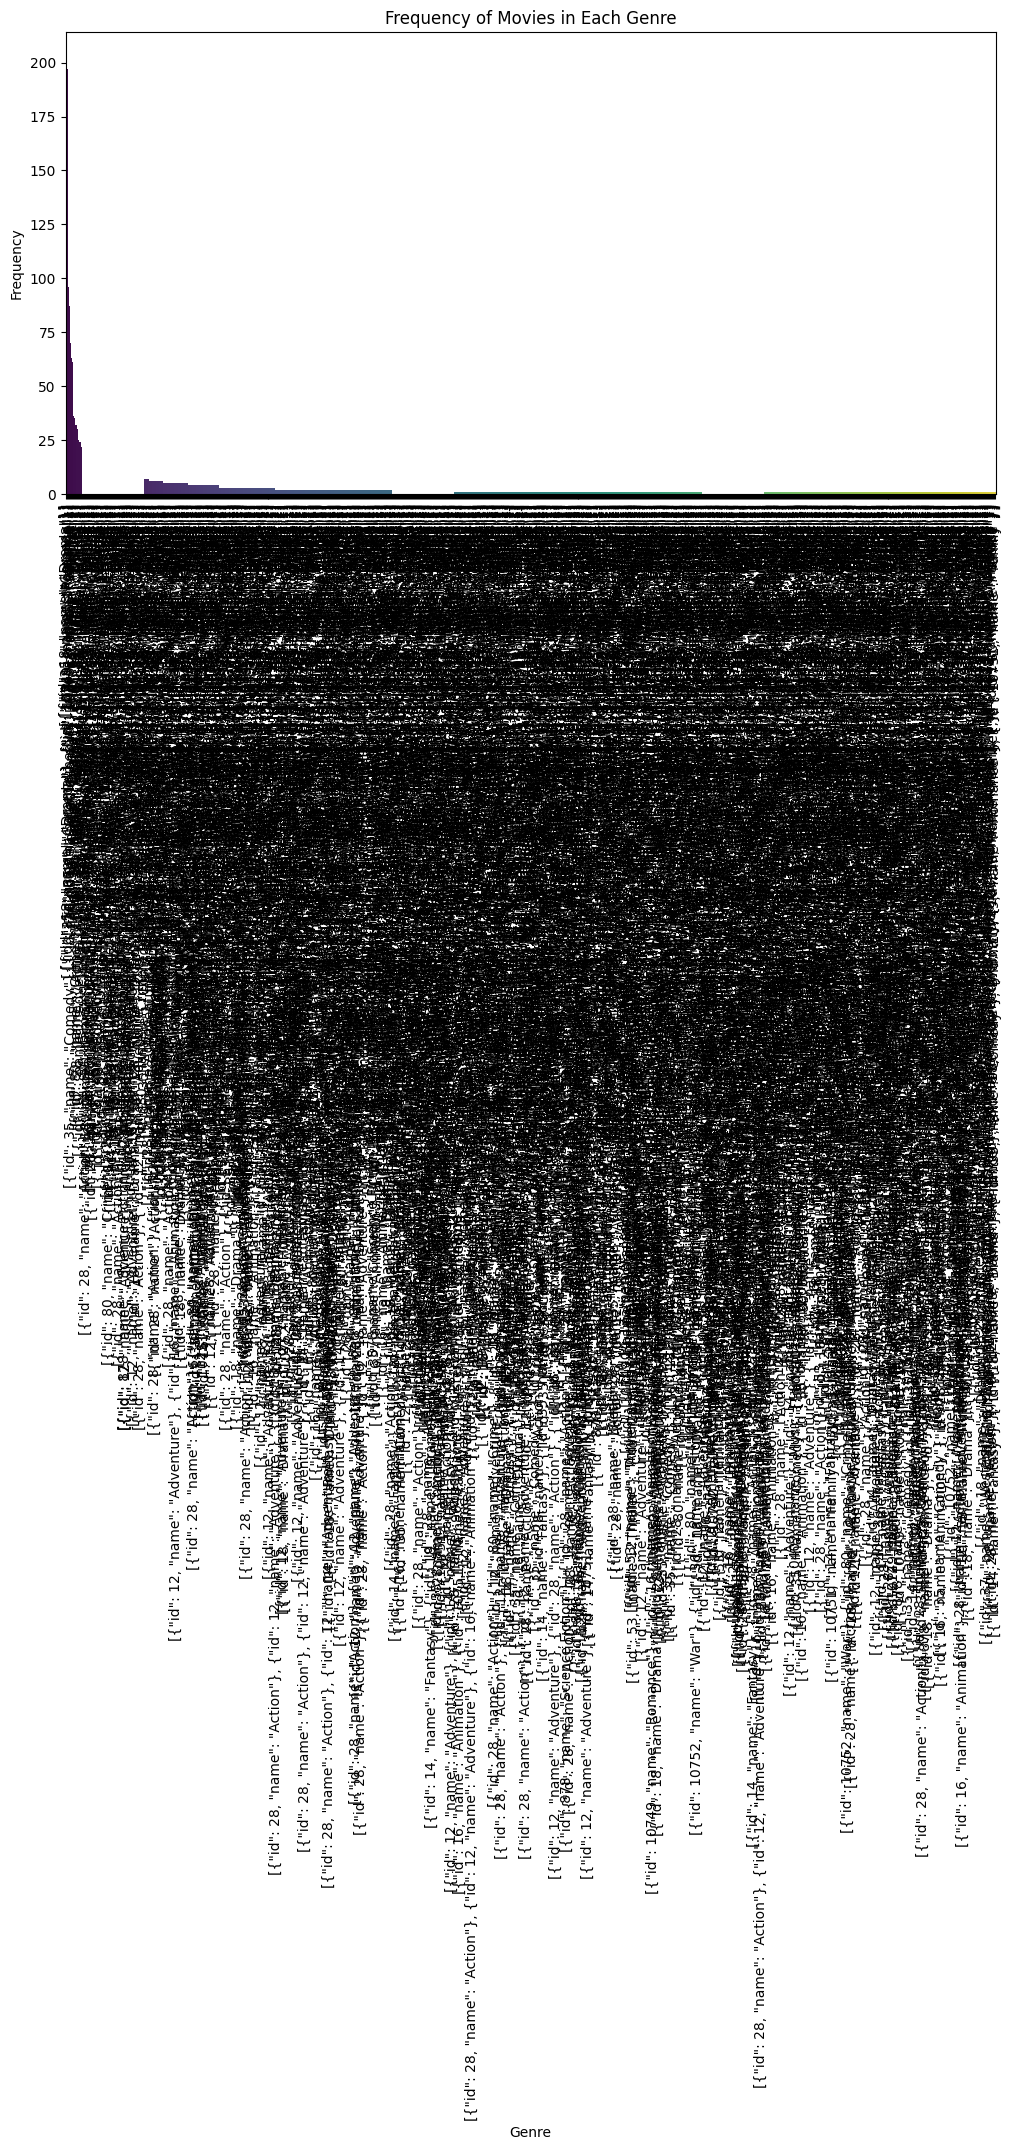

In [113]:
 # Code here
import matplotlib.pyplot as plt
import seaborn as sns

# Split the 'genres' column into a list of genres
df['genres'] = df['genres'].str.split('|')

# Create a list of all genres
all_genres = [genre for genres in df['genres'] for genre in genres]

# Count the frequency of each genre
genre_counts = pd.Series(all_genres).value_counts()

# Create a bar plot for genre frequency
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.title('Frequency of Movies in Each Genre')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()


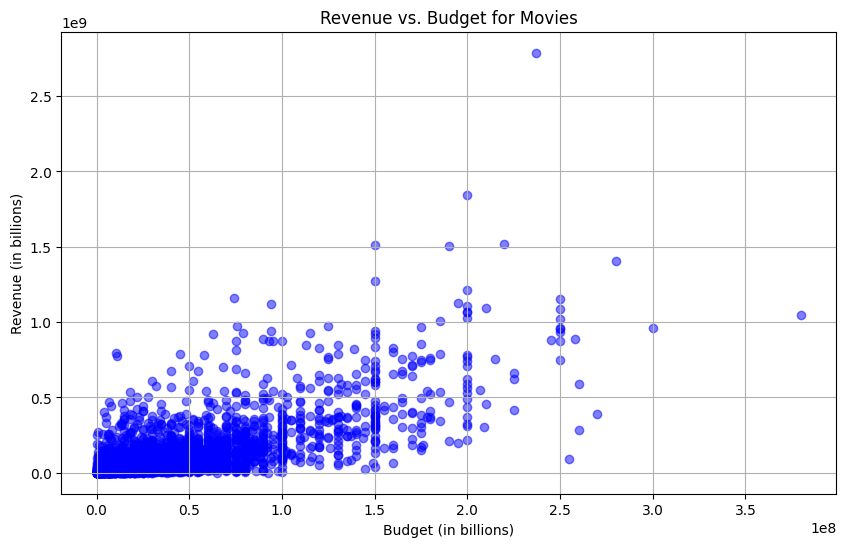

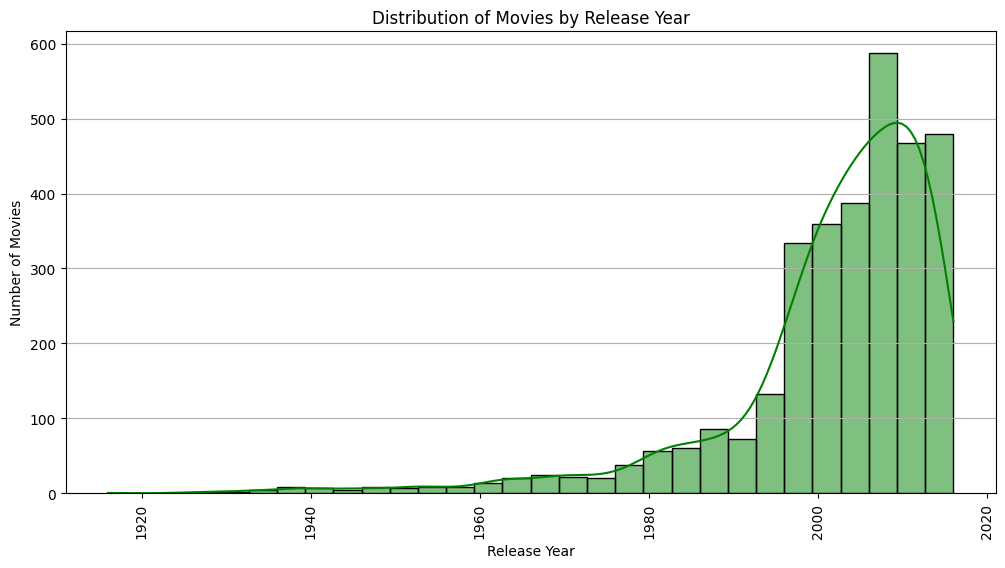

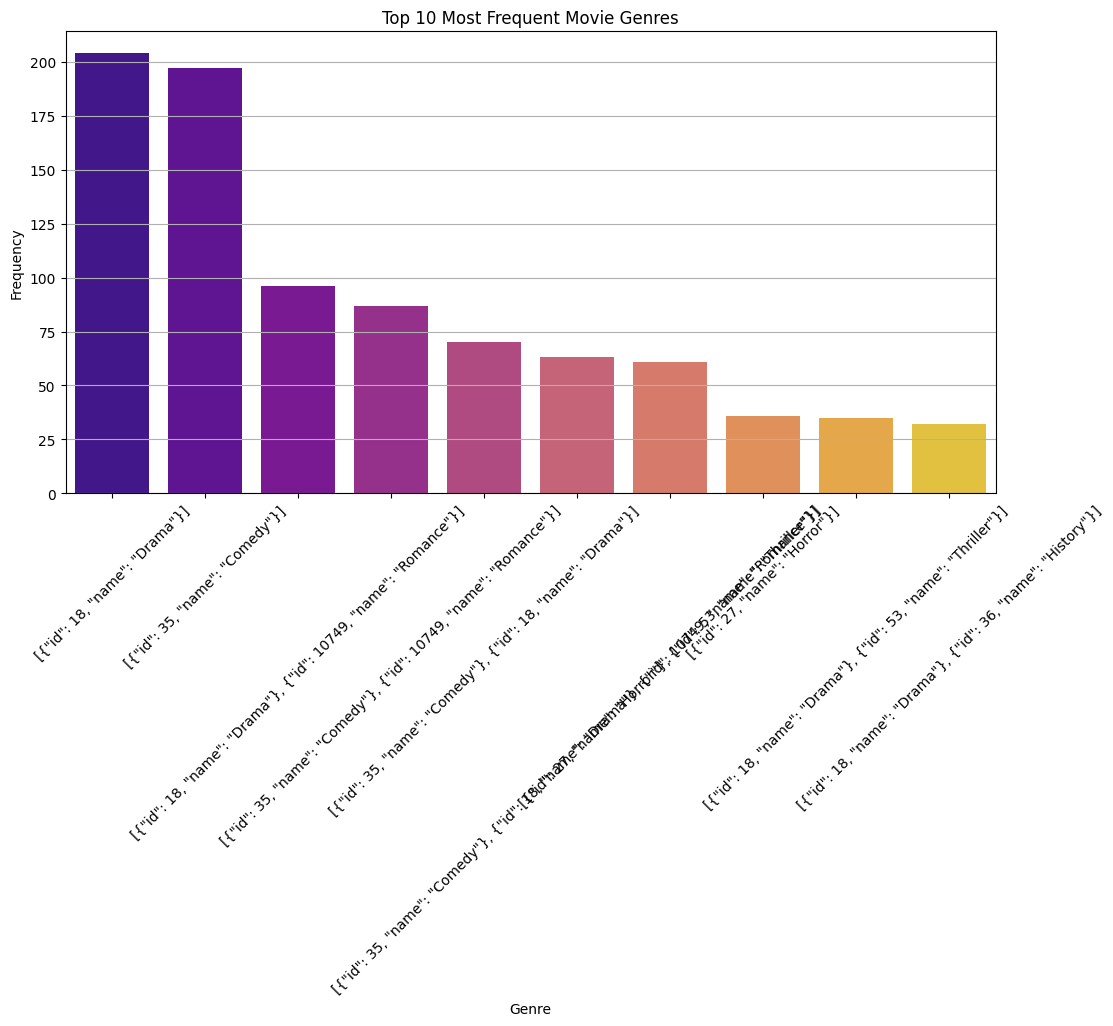

In [115]:
# Generate three different interesting visualisations with a data story.
# Visualization 1: Revenue vs. Budget Scatter Plot
# Data Story: One of the key factors for measuring a movie's success is its revenue compared to its budget. 
# This scatter plot visualizes the relationship between a movie's budget and its revenue. 
# It helps us understand if higher budgets result in higher revenue.

import matplotlib.pyplot as plt

# Create a scatter plot of budget vs. revenue
plt.figure(figsize=(10, 6))
plt.scatter(df['budget'], df['revenue'], alpha=0.5, color='blue')
plt.title('Revenue vs. Budget for Movies')
plt.xlabel('Budget (in billions)')
plt.ylabel('Revenue (in billions)')
plt.grid(True)
plt.show()
# Data Story: From the scatter plot, we observe that there is a positive correlation between budget and revenue, suggesting that,
# in general, movies with higher budgets tend to generate higher revenue. 
# However, there are also many outliers, indicating that success depends on other factors as well.

# Visualization 2: Movie Release Year Histogram
# Data Story: Let's explore the distribution of movies based on their release years. 
# This histogram will help us understand how the number of movies released has changed over the years.
import seaborn as sns

# Create a histogram of movie release years
plt.figure(figsize=(12, 6))
sns.histplot(df['release_year'], bins=30, color='green', kde=True)
plt.title('Distribution of Movies by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()
# Data Story: The histogram reveals that the number of movies released has increased significantly over the years, 
# with a peak in the 2000s. 
# This suggests a growth in the film industry, likely due to advancements in technology and increased global interest in cinema.

# Visualization 3: Genre Distribution Bar Chart
# Data Story: To understand the popularity of different movie genres, 
# we can create a bar chart that shows the distribution of genres among the movies in the dataset.
# Count the frequency of each genre
genre_counts = pd.Series(all_genres).value_counts().head(10)

# Create a bar plot for the top 10 most frequent genres
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='plasma')
plt.title('Top 10 Most Frequent Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Data Story: The bar chart highlights the top 10 most frequent movie genres. 
# We can see that "Drama" and "Comedy" are the most common genres, followed by "Thriller" and "Action." 
# This information provides insights into audience preferences and the diversity of movies available.


